In [1]:
from LineSplitAuro import LineSplit
from WordSplit import WordSplit
from nltk.translate.bleu_score import sentence_bleu

In [2]:
# check files

files = ['summary_sriAurobindo.txt', 'Ref_SriAurobindo_sir.txt', 'Ref_SriAurobindo_chandni.txt', 'Ref_SriAurobindo_mihir.txt', 'Ref_SriAurobindo_sweta.txt']

for file in files:
    print(f"Lines Count {file}: ", len(LineSplit(file)))

Lines Count summary_sriAurobindo.txt:  9
Lines Count Ref_SriAurobindo_sir.txt:  9
Lines Count Ref_SriAurobindo_chandni.txt:  9
Lines Count Ref_SriAurobindo_mihir.txt:  9
Lines Count Ref_SriAurobindo_sweta.txt:  9


In [3]:
conf_matrix = []

In [4]:
for ref in files:
    refList = WordSplit(LineSplit(ref))
    row = []
    for can in files:
        canList = WordSplit(LineSplit(can))
        
        refListCopy = refList.copy()
        canFinal = []
        refFinal = []
        
        for item in canList:
            if item in refListCopy:
                canFinal.append(item)
                refFinal.append(item)
                canList.remove(item)
                refListCopy.remove(item)

        canFinal += canList
        refFinal += refListCopy
        
        row.append(sentence_bleu([refFinal], canFinal))
    conf_matrix.append(row)

conf_matrix

[[1.0,
  0.5948847698765467,
  0.4765114263954724,
  0.5244942507698612,
  0.47398298474056405],
 [0.606876440872367,
  1.0,
  0.5242010036403956,
  0.49923792230817327,
  0.5349517687815172],
 [0.453880858626112,
  0.48301840772655186,
  1.0,
  0.3845224697643658,
  0.47111179391220936],
 [0.5401979272177767,
  0.5003105223269352,
  0.42448920636232085,
  1.0,
  0.7111714829672661],
 [0.4920939046902355,
  0.5411653101735564,
  0.5145153881346433,
  0.7048731713640287,
  1.0]]

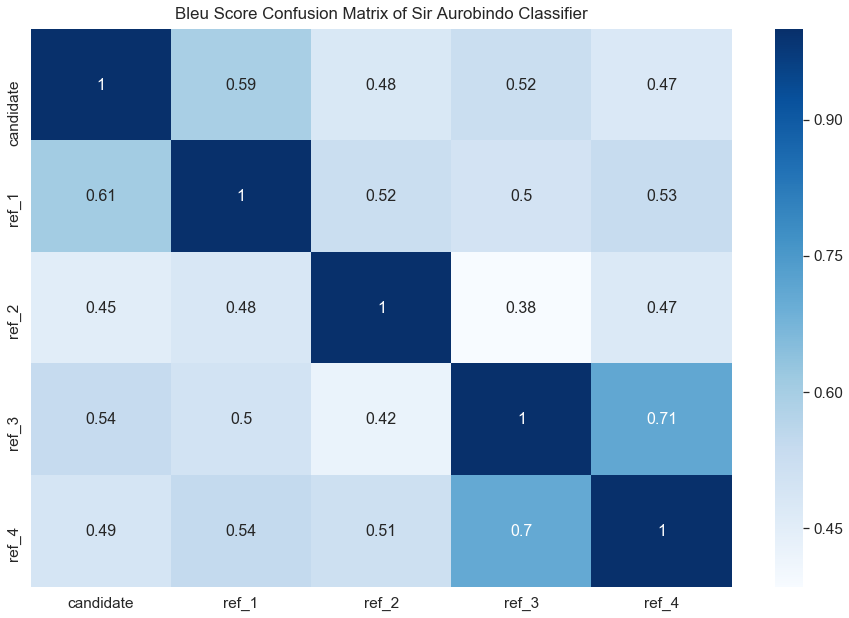

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# 'candidate', 'ref_sir', ref_chandni', 'ref_mihir', 'ref_sweta'

df_cm = pd.DataFrame(conf_matrix, index = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'],
                  columns = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'])


sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size
plt.title(label="Bleu Score Confusion Matrix of Sir Aurobindo Classifier", pad=10.0)
plt.savefig('confusion_bleu_sriaurobindo.png')
plt.show()